## What is the reflectivity?

From Wikipedia:
> Reflectivity is the square of the magnitude of the Fresnel reflection coefficient, which is the ratio of the reflected to incident electric field; as such the reflection coefficient can be expressed as a complex number as determined by the Fresnel equations for a single layer, whereas the reflectance is always a positive real number. For homogeneous and semi-infinite materials, reflectivity is the same as reflectance.

😪😪😪😪

Not very helpful. What is the reflectance?

> Reflectance of the surface of a material is its effectiveness in reflecting radiant energy. It is the fraction of incident electromagnetic power that is reflected at an interface.

😪😪😪😪

Ok, but what does it means?

The radar sends a microwave beam, when it encounters a conductive object, this beams is partly absorbed by the target (called attenuation) and partly scattered in all directions. The radar antenna collects the part of the beam that is scattered back to it (the backscattering). The intensity (power) of the electromagnetic wave that is backscattered to the antenna, we call it Reflectivity (because it is reflected back to the antenna).

## Let's open and plot a data file.

### Side note:

Radars are fixed instrument, generally put on top of a tower. They scan the atmosphere by spinning. They usually spin 360°, then change elevation (tilt higher) then spins 360° again, several time, up until we have a 3D representation of the atmosphere. Thus, by spinning and changing elevation, radar data are in **spherical coordinates**. However, not the *mathematical* definition of the spherical coordinates, it's the nautical definition. The azimuth starts at North and goes clock-wise (while mathematically it starts on the x-axis and goes counter-clockwise). Also, for radars coordinates the elevation goes upward, from ground to zenith (while in math the elevation goes from the z-axis, up, to the xy-plane, down).

In short, 0° azimuth is North, 90° is East, 180° is South and 270° is West, increasing clockwise. For the elevation, 0° is the plane parallel to the ground and 90° is the zenith.
![coords](img/coords.png)
In this workshop, we'll be using data that have been gridded. So all the data herein are in Cartesian coordinates (xyz). Just know that the measurements are made in spherical coordinates.

In [1]:
%matplotlib inline

import pyart
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
dset = xr.open_dataset('data/twp1440cpol.reflectivity.c1.20170304.nc')
refl = dset.reflectivity.values

In [3]:
x = np.linspace(-150e3, 150e3, 117)  # X-axis coordinates in meters
y = np.linspace(-150e3, 150e3, 117)  # Y-axis coordinates in meters

Configuring the projection in cartopy to plot the data onto a map. As specified in the dataset, the projection used for the data is aeqd (Azimuthal Equidistant)

In [4]:
projection = ccrs.AzimuthalEquidistant(central_longitude=dset.attrs['origin_longitude'],
                                       central_latitude=dset.attrs['origin_latitude'])

Time dimension length is 144, so you can change step from 0 to 143 to see a different timestep.

/home/548/vhl548/.local/miniconda3/envs/radar/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if isinstance(obj, collections.Iterator):
/home/548/vhl548/.local/miniconda3/envs/radar/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


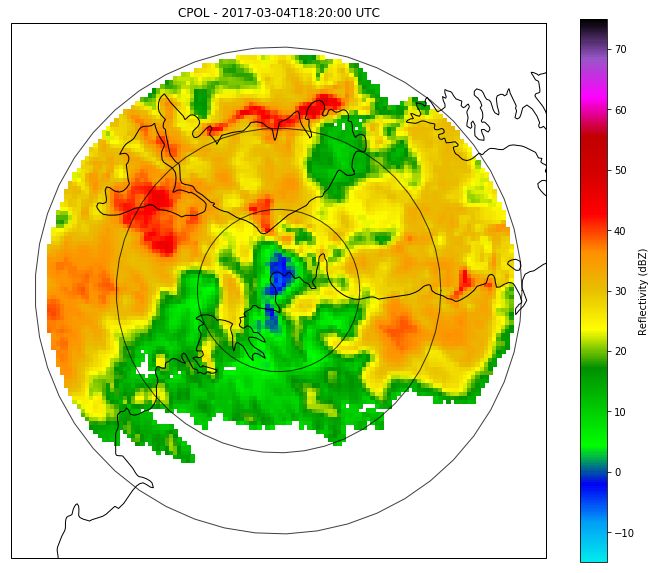

In [5]:
step = 110
datetime = pd.Timestamp(dset.time[step].to_pandas())

fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(1, 1, 1, projection=projection)
ax1.coastlines('10m')
im = ax1.pcolormesh(x, y, refl[step, :, :], vmin=-15, vmax=75, cmap='pyart_NWSRef')

# Plotting the range rings.
theta = np.linspace(0, 2 * np.pi)
for r in [50e3, 100e3, 150e3]:
    ax1.plot(r * np.cos(theta), r * np.sin(theta), 'k', linewidth=1, alpha=0.75)

plt.colorbar(im, ax=ax1, label='Reflectivity (dBZ)')
plt.title(f'CPOL - {datetime.isoformat()} UTC')
plt.show()

## Marshall–Palmer relation

The Z–R relationship developed by J. S. Marshall and W. M. Palmer (1948) is traditionally used to transform reflectivity into rainfall rate.

The relationship is $Z = 200R^{1.6}$, where $Z\, (mm^6\cdot m^{-3})$ is the reflectivity factor and $R\, \mathrm{(mm\cdot h^{-1})}$ is the rainfall rate. The relationship is sometimes generalized to the form $Z = aR^b$, where $a$ and $b$ are adjustable parameters.

> Marshall, J. S., and W. McK. Palmer, 1948: The distribution of raindrops with size. J. Meteor., 5, 165–166.

In [6]:
marshall_palmer = lambda r: 200 * r ** 1.6
rainrate = np.linspace(0.1, 1e3)
reflectivity = marshall_palmer(rainrate)

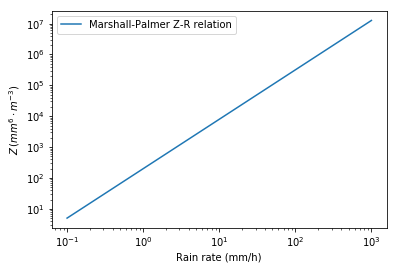

In [7]:
plt.plot(rainrate, reflectivity, label='Marshall-Palmer Z-R relation')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rain rate (mm/h)')
plt.ylabel(r'$Z\, (mm^6\cdot m^{-3})$')
plt.show()

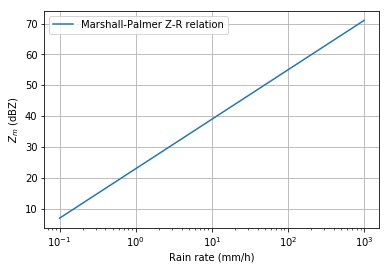

In [8]:
plt.plot(rainrate, 10 * np.log10(reflectivity), label='Marshall-Palmer Z-R relation')
plt.legend()
plt.xscale('log')
plt.xlabel('Rain rate (mm/h)')
plt.ylabel('$Z_m$ (dBZ)')
plt.grid()
plt.show()

# Exercise 1

Using the Marshall-Palmer relationship, plot the rainfall rate from the reflectivity measured on the first plot. 

Remember:
$$ Z_m \,(dBZ) = 10 \log_{10} Z $$

In [9]:
# Solution: %load intro_exercise1.py